In [1]:
import os
import string
import pandas as pd
import matplotlib.pyplot as plt
import pydicom


Bad key "text.kerning_factor" on line 4 in
/pylon5/ac5616p/yuke/anaconda3/envs/R3Kernel/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib inline

In [3]:
r3_path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3'
r3_notes_path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3'
r3_img_path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3/20_Batmanghelich'

# R3 Demographics Analysis

In [10]:
r3_demo_path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3/20_BATMANGHELICH_NOTES_DATA_2020_04_03/R3_20_BATMANGHELICH_DEMOGRAPHICS_2020_04_02.xlsx'

In [5]:
r3_demo_df = pd.read_excel(r3_demo_path)

In [6]:
r3_demo_df.head()

,PATIENT_STUDY_ID,BIRTH_DATE,DEATH_DATE,GENDER,RACE,ETHNICITY
0,111111139,04/20/1938,NaN,MALE,WHITE,NOT HISPANIC OR LATINO
1,111111670,12/01/1950,04/23/2018,MALE,WHITE,NOT HISPANIC OR LATINO
2,111111263,05/28/1950,NaN,MALE,WHITE,NOT HISPANIC OR LATINO
3,111110014,02/25/1935,07/12/2018,MALE,WHITE,NOT HISPANIC OR LATINO
4,111110002,08/27/1942,NaN,FEMALE,BLACK,NOT HISPANIC OR LATINO


In [7]:
# total number of patients
print('Total distinct patients:{0}'.format(r3_demo_df['PATIENT_STUDY_ID'].nunique()))

Total distinct patients:10174


In [8]:
# counts by gender
r3_demo_df.groupby('GENDER')['PATIENT_STUDY_ID'].nunique()

GENDER
FEMALE    5177
MALE      4997
Name: PATIENT_STUDY_ID, dtype: int64

In [9]:
# counts by race
r3_demo_df.groupby('RACE')['PATIENT_STUDY_ID'].nunique()

RACE
ALASKA NATIVE                1
AMERICAN INDIAN             12
BLACK                      838
CHINESE                     22
DECLINED                   117
FILIPINO                     4
GUAM/CHAMORRO                3
HAWAIIAN                     2
INDIAN (ASIAN)              15
JAPANESE                     3
KOREAN                       3
NOT SPECIFIED               92
OTHER ASIAN                 34
OTHER PACIFIC ISLANDER       4
SAMOAN                       1
VIETNAMESE                   4
WHITE                     9006
Name: PATIENT_STUDY_ID, dtype: int64

In [10]:
# counts by ethinicity
r3_demo_df.groupby('ETHNICITY')['PATIENT_STUDY_ID'].nunique()

ETHNICITY
DECLINED                   270
HISPANIC OR LATINO          61
NOT HISPANIC OR LATINO    9432
NOT SPECIFIED              253
Name: PATIENT_STUDY_ID, dtype: int64

In [11]:
# number of deaths (about 20%)
sum(-r3_demo_df['DEATH_DATE'].isnull())

2060

# R3 Image

## data profiling preparation

In [4]:
path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3/20_Batmanghelich/'

In [5]:
root_lst = []
series_lst = []
sid_lst = []
pid_lst = []
files_lst = []
meta_lst = []
patient_age_lst = []
patient_sex_lst = []
scan_modality_lst = []
scan_date_lst = []
scan_time_lst = []
scan_body_part_lst = []
scan_option_lst = []
scan_slicethickness_lst = []
scan_spacing_lst = []
scan_pixel_spacing_1_lst = []
scan_pixel_spacing_2_lst = []
scan_rows_lst = []
scan_cols_lst = []
scan_kvp_lst = []
scan_xraycurrent_lst = []
scan_exposuretime_lst = []

for root, dirs, files in os.walk(path, topdown=True):
    if root.count('/') == 11: # if it is a dicom series folder
        # use path as the key
        root_lst.append(root)
        # extract patient id from the path
        sub_path = root.split('/')[9]
        pid_lst.append(sub_path.split('_')[-1])
        # extract study id from the path
        sub_path = root.split('/')[10]
        sid_lst.append(sub_path.split('_')[-1])
        # extract series folder name
        series_lst.append(root.split('/')[-1])
        # count number of dicom images
        files_lst.append(len(files))
        
        # read the first dicom file in current path
        try:
            dicom_file_path = os.path.join(root, files[0])
            # meta elements in the dicom file
            ds = pydicom.filereader.dcmread(dicom_file_path)
        except:
            ds = None
        try:
            patient_age_lst.append(ds.PatientAge) # age
        except:
            patient_age_lst.append(None)
        try:
            patient_sex_lst.append(ds.PatientSex) # sex
        except:
            patient_sex_lst.append(None)
        try:
            scan_modality_lst.append(ds.Modality) # scan modality
        except:
            scan_modality_lst.append(None)
        try:
            scan_date_lst.append(ds.AcquisitionDate) # scan date
        except:
            scan_date_lst.append(None)
        try:
            scan_time_lst.append(ds.AcquisitionTime) # scan time
        except:
            scan_time_lst.append(None)
        try:
            scan_body_part_lst.append(ds.BodyPartExamined) # scan body part
        except:
            scan_body_part_lst.append(None)
        try:
            scan_slicethickness_lst.append(ds.SliceThickness) # slice thickness
        except:
            scan_slicethickness_lst.append(None)
        try:
            scan_spacing_lst.append(ds.SpacingBetweenSlices) # slice spacing
        except:
            scan_spacing_lst.append(None)
        try:
            scan_pixel_spacing_1_lst.append(ds.PixelSpacing[0]) # pixel spacing direction 1
        except:
            scan_pixel_spacing_1_lst.append(None)
        try:
            scan_pixel_spacing_2_lst.append(ds.PixelSpacing[1]) # pixel spacing direction 2
        except:
            scan_pixel_spacing_2_lst.append(None)
        try:
            scan_rows_lst.append(ds.Rows) # number of pixels per row
        except:
            scan_rows_lst.append(None)
        try:
            scan_cols_lst.append(ds.Columns) # number of pixels per column
        except:
            scan_cols_lst.append(None)
        try:
            scan_kvp_lst.append(ds.KVP) # kilovoltage applied to the x-ray tube
        except:
            scan_kvp_lst.append(None)
        try:
            scan_xraycurrent_lst.append(ds.XRayTubeCurrent) # x-ray current
        except:
            scan_xraycurrent_lst.append(None)
        try:
            scan_exposuretime_lst.append(ds.ExposureTime) # exposure time
        except:
            scan_exposuretime_lst.append(None)

In [13]:
dicom_profile = {'path':root_lst,
                'pid':pid_lst,
                'sid':sid_lst,
                'series':series_lst,
                'files':files_lst,
                'age':patient_age_lst,
                'sex':patient_sex_lst,
                'modality':scan_modality_lst,
                'date': scan_date_lst,
                'time': scan_time_lst,
                'body_part': scan_body_part_lst,
                'slice_thickness': scan_slicethickness_lst,
                'slice_spacing': scan_spacing_lst,
                'pixcel_spacing_1': scan_pixel_spacing_1_lst,
                'pixcel_spacing_2': scan_pixel_spacing_2_lst,
                'rows':scan_rows_lst,
                'columns':scan_cols_lst,
                'kvp': scan_kvp_lst,
                'x_ray_current': scan_xraycurrent_lst,
                'exposure_time': scan_exposuretime_lst
                }

In [14]:
dicom_profile_df = pd.DataFrame.from_dict(dicom_profile)

In [15]:
dicom_profile_df.head()

,path,pid,sid,series,files,age,sex,modality,date,time,body_part,slice_thickness,slice_spacing,pixcel_spacing_1,pixcel_spacing_2,rows,columns,kvp,x_ray_current,exposure_time
0,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_302_LUNG_2.5,129,076Y,M,CT,20170101,084817.737107,CHEST,2.500,-2.500,0.710938,0.710938,512.0,512.0,120.0,185.0,349.0
1,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_1_Scout,2,076Y,M,CT,20170101,084729.320407,CHEST,370.000,10.000,0.636364,0.646341,582.0,820.0,80.0,20.0,3782.0
2,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_2_CHEST_WITHOUT,513,076Y,M,CT,20170101,084817.737107,CHEST,0.625,-0.625,0.710938,0.710938,512.0,512.0,120.0,231.0,349.0
3,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_301_SOFT_2.5,129,076Y,M,CT,20170101,084817.737107,CHEST,2.500,-2.500,0.710938,0.710938,512.0,512.0,120.0,185.0,349.0
4,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_5_CHEST_WO,436,081Y,F,CT,20180101,151917.602455,None,0.625,0.625,0.689453,0.689453,512.0,512.0,120.0,647.0,400.0


In [16]:
dicom_profile_df.to_csv('R3_dicom_profile.csv', index=False)

## series profiling analysis

In [139]:
dicom_profile_df = pd.read_csv('R3_dicom_profile.csv')

In [5]:
# show samples
dicom_profile_df.head()

,path,pid,sid,series,files,age,sex,modality,date,time,body_part,slice_thickness,slice_spacing,rows,columns,kvp,x_ray_current,exposure_time
0,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_302_LUNG_2.5,129,076Y,M,CT,20170101.0,84817.737107,CHEST,2.500,-2.500,512.0,512.0,120.0,185.0,349.0
1,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_1_Scout,2,076Y,M,CT,20170101.0,84729.320407,CHEST,370.000,10.000,582.0,820.0,80.0,20.0,3782.0
2,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_2_CHEST_WITHOUT,513,076Y,M,CT,20170101.0,84817.737107,CHEST,0.625,-0.625,512.0,512.0,120.0,231.0,349.0
3,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_301_SOFT_2.5,129,076Y,M,CT,20170101.0,84817.737107,CHEST,2.500,-2.500,512.0,512.0,120.0,185.0,349.0
4,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_5_CHEST_WO,436,081Y,F,CT,20180101.0,151917.602455,NaN,0.625,0.625,512.0,512.0,120.0,647.0,400.0


In [141]:
# total number of dicom series
print('Total number of dicom series:', dicom_profile_df.shape[0])

Total number of dicom series: 49933


In [142]:
# distribution of number of files
dicom_profile_df['files'].describe()

count    49933.000000
mean       176.207037
std        171.725817
min          0.000000
25%         65.000000
50%        126.000000
75%        266.000000
max       2560.000000
Name: files, dtype: float64

In [143]:
# number of patients (roughly match with the demographics data)
dicom_profile_df['pid'].nunique()

10117

In [144]:
# number of patients who have at lest one seriers > 266 dicom images
# (most of the patients, or 97.6% patients, have at least one series containing 266 or more images)
ind = dicom_profile_df['files'] >= 266
dicom_profile_df[ind]['pid'].nunique()

9872

In [145]:
# is there any naming pattern associated with the number of images?
s1 = dicom_profile_df.groupby('series')['files'].mean()
s2 = dicom_profile_df.groupby('series')['files'].count()
series_df = pd.concat([s1,s2],axis=1).reset_index()
series_df.columns = ['series', 'avg_files', 'count']

In [146]:
series_df.sort_values(by='count', ascending=False).head(20)

,series,avg_files,count
121,Series_1_SCOUT,1.989225,6682
811,Series_4_LUNG_2.5,119.510458,2247
683,Series_3_SOFT_2.5,119.014027,2210
241,Series_2_DR_30,474.576617,1762
805,Series_4_LUNG,132.627890,1384
740,Series_401_Reformatted,142.569421,1210
738,Series_400_Reformatted,235.137759,1205
127,Series_1_Scout,2.001735,1153
134,Series_1_scout,2.003413,879
112,Series_1_AP_LAT_SCOUT,1.998792,828


## dicom meta data analysis

In [12]:
dicom_profile_df = pd.read_csv('R3_dicom_profile.csv')

### meta samples

In [13]:
# show samples
dicom_profile_df.head(20)

,path,pid,sid,series,files,age,sex,modality,date,time,body_part,slice_thickness,slice_spacing,rows,columns,kvp,x_ray_current,exposure_time
0,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_302_LUNG_2.5,129,076Y,M,CT,20170101.0,84817.737107,CHEST,2.500000,-2.500,512.0,512.0,120.0,185.0,349.0
1,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_1_Scout,2,076Y,M,CT,20170101.0,84729.320407,CHEST,370.000000,10.000,582.0,820.0,80.0,20.0,3782.0
2,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_2_CHEST_WITHOUT,513,076Y,M,CT,20170101.0,84817.737107,CHEST,0.625000,-0.625,512.0,512.0,120.0,231.0,349.0
3,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_301_SOFT_2.5,129,076Y,M,CT,20170101.0,84817.737107,CHEST,2.500000,-2.500,512.0,512.0,120.0,185.0,349.0
4,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_5_CHEST_WO,436,081Y,F,CT,20180101.0,151917.602455,NaN,0.625000,0.625,512.0,512.0,120.0,647.0,400.0
5,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_605_SPINE,136,081Y,F,CT,20180101.0,151917.602455,NaN,2.000000,NaN,512.0,512.0,120.0,NaN,400.0
6,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_601_8_X_1_CHEST,286,081Y,F,CT,20180101.0,151917.602455,NaN,8.000001,NaN,512.0,512.0,120.0,NaN,400.0
7,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_1_SCOUT,2,081Y,F,CT,20180101.0,151719.738681,NaN,355.545457,10.000,651.0,888.0,80.0,40.0,3626.0
8,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_3_CHEST_WO,109,081Y,F,CT,20180101.0,151917.602455,NaN,2.500000,0.625,512.0,512.0,120.0,647.0,400.0
9,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_4_LUNG,109,081Y,F,CT,20180101.0,151917.602455,NaN,2.500000,0.625,512.0,512.0,120.0,647.0,400.0


In [14]:
# show 2 dicom meta data samples
sample_path = dicom_profile_df.iloc[2,:]
dir_path = sample_path.path

i = 0
for _,_,files in os.walk(dir_path):
    for f in files:
        file_path = os.path.join(dir_path, f)
        print(file_path)
        ds = pydicom.filereader.dcmread(file_path)
        print(ds)
        print('\n')
        i+=1
        if(i>=2):
            break

/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3/20_Batmanghelich/10/Patient_0111259663/Study_CT_CHEST_WITHOUT_CONTRAST_41209592/Series_2_CHEST_WITHOUT/1.173628060384414930913011079890345343151.dcm
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20170101'
(0008, 0013) Instance Creation Time              TM: '084830'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.173628060384414930913011079890345343151
(0008, 0020) Study Date                          DA: '20170101'
(0008, 0021) Series Date                         DA: '20170101'
(0008, 0022) Acquisition Date                    DA: '20170101'
(0008, 0023) Content Date                        DA: '20170101'
(0008, 0030) Study Time                          TM: '084635'
(0008, 0031) Series Time                  

In [15]:
ds.PixelSpacing

[0.710938, 0.710938]

### meta statistics

In [101]:
# reduce series level to patient level
# select series with most images per patient
idx = dicom_profile_df.groupby(['pid'])['files'].transform(max) == dicom_profile_df['files']
pt_dicom_profile_df = dicom_profile_df[idx]

In [102]:
pt_dicom_profile_df.head()

,path,pid,sid,series,files,age,sex,modality,date,time,body_part,slice_thickness,slice_spacing,rows,columns,kvp,x_ray_current,exposure_time
2,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111259663,41209592,Series_2_CHEST_WITHOUT,513,076Y,M,CT,20170101.0,84817.737107,CHEST,0.625,-0.625,512.0,512.0,120.0,231.0,349.0
4,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0111225336,43814074,Series_5_CHEST_WO,436,081Y,F,CT,20180101.0,151917.602455,NaN,0.625,0.625,512.0,512.0,120.0,647.0,400.0
10,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0110950981,42086009,Series_2_DR_30,519,050Y,M,CT,20170101.0,224711.918638,NaN,0.625,0.625,512.0,512.0,120.0,696.0,400.0
19,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0119239036,40732683,Series_300_Reformatted,184,070Y,M,CT,20170101.0,191517.000000,NaN,2.000,NaN,512.0,512.0,120.0,397.0,808.0
22,/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R...,0110316446,43970439,Series_4_THINS,588,063Y,M,CT,20180101.0,172511.791334,NaN,0.625,2.500,512.0,512.0,120.0,600.0,400.0


#### age distribution

In [103]:
# age distribution
idx = -pt_dicom_profile_df['age'].isna()
age = list(pt_dicom_profile_df[idx]['age'])

In [104]:
age_n = []
for x in age:
    s= x.strip('0')[:-1]
    if s=='':
        a=0
    else:
        a=int(s)
    age_n.append(a)

In [105]:
pd.Series(age_n).describe()

count    10489.000000
mean        65.971971
std         14.959052
min          0.000000
25%         58.000000
50%         67.000000
75%         76.000000
max        116.000000
dtype: float64

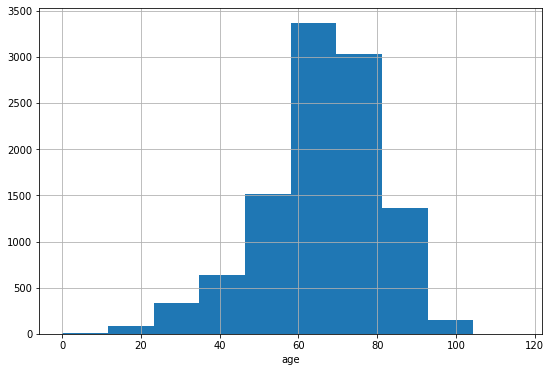

In [106]:
fig = plt.figure(figsize=(9,6))
ax = pd.Series(age_n).hist()
ax.set_xlabel('age')
plt.show()

#### slice spacing

In [107]:
# age distribution
idx = -pt_dicom_profile_df['slice_spacing'].isna()
pt_dicom_profile_df[idx]['slice_spacing'].describe()

count    7440.000000
mean        1.818149
std         5.444075
min        -2.500000
25%         0.625000
50%         0.625000
75%         0.800000
max        35.000000
Name: slice_spacing, dtype: float64

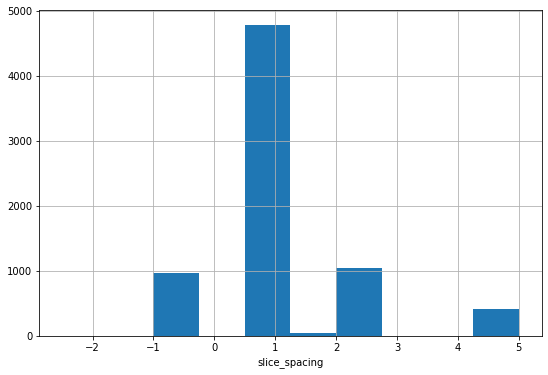

In [108]:
# excluding slice spacing > 10 mm
fig = plt.figure(figsize=(9,6))
idx = pt_dicom_profile_df['slice_spacing'] < 10
ax = pt_dicom_profile_df[idx]['slice_spacing'].hist()
ax.set_xlabel('slice_spacing')
plt.show()

# R3 Notes

In [21]:
r3_notes_dict = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/R3/20_BATMANGHELICH_NOTES_DATA_2020_04_03/R3_20_BATMANGHELICH_PROCEDURE_NOTES_METADATA_DEID_2020_04_02.xlsx'


In [27]:
r3_notes_meta_df = pd.read_excel(r3_notes_dict, dtype=str)

In [28]:
r3_notes_meta_df.head()

,PATIENT_STUDY_ID,ORDER_DATE,RESULT_TIME,PROCEDURE_CODE,PROCEDURE_NAME,ACCESSION_STUDY_ID,NOTE_STUDY_ID,NOTE_CSN_STUDY_ID
0,0110000087,02/14/2017 15:35:00,02/17/2017 15:22:00,74176,CT ABDOMEN AND PELVIS WITHOUT CONTRAST,49955263,539216381,442362360
1,0110000087,03/12/2017 18:40:00,03/12/2017 20:11:00,74176,CT ABDOMEN AND PELVIS WITHOUT CONTRAST,49229914,533526235,457830446
2,0110000087,02/08/2018 13:06:00,02/19/2018 10:53:00,71250,CT CHEST WITHOUT CONTRAST,43754750,7603198677,520069287
3,0110000087,07/05/2017 00:06:00,07/05/2017 00:24:00,74176,CT ABDOMEN AND PELVIS WITHOUT CONTRAST,40436615,7666701228,570342923
4,0110000639,09/22/2017 13:18:00,09/29/2017 01:24:00,71250,CT CHEST WITHOUT CONTRAST,41382337,7673928041,598512550


In [34]:
pid = '0110006016'
sid = '42928897'
ind = r3_notes_meta_df['PATIENT_STUDY_ID'] == pid
r3_notes_meta_df[ind]

,PATIENT_STUDY_ID,ORDER_DATE,RESULT_TIME,PROCEDURE_CODE,PROCEDURE_NAME,ACCESSION_STUDY_ID,NOTE_STUDY_ID,NOTE_CSN_STUDY_ID
113,0110006016,11/17/2017 16:18:00,11/18/2017 11:52:00,71250,CT CHEST WITHOUT CONTRAST,42928897,7684776429,500735035
114,0110006016,11/17/2017 16:18:00,11/18/2017 11:52:00,71250,CT CHEST WITHOUT CONTRAST,42928897,7684776319,500735913
115,0110006016,12/01/2017 15:59:00,12/08/2017 16:27:00,71250,CT CHEST WITHOUT CONTRAST,42180042,7698748740,504081756
116,0110006016,12/01/2017 15:59:00,12/08/2017 16:27:00,71250,CT CHEST WITHOUT CONTRAST,42180042,7698709464,504941771
117,0110006016,02/26/2018 12:27:00,02/28/2018 16:55:00,71250,CT CHEST WITHOUT CONTRAST,43905578,7605453139,522428661
118,0110006016,02/26/2018 12:27:00,02/28/2018 16:55:00,71250,CT CHEST WITHOUT CONTRAST,43905578,7605563232,522438302


In [35]:
r3_notes_meta_df.shape

(38459, 8)

In [36]:
r3_notes_meta_df['NOTE_STUDY_ID'].nunique()

38459

In [37]:
r3_notes_meta_df['NOTE_CSN_STUDY_ID'].nunique()

38459

In [38]:
r3_notes_meta_df['PATIENT_STUDY_ID'].nunique()

10102

In [39]:
r3_notes_meta_df['ACCESSION_STUDY_ID'].nunique()

25805

## R3 keywords (defined in chexpert) profiling

1. cd /pylon5/ac5616p/yuke/PythonProject/chexpert-labeler
2. conda activate negbio3.7
3. python label.py
4. output to /pylon5/ac5616p/yuke/PythonProject/chexpert-labeler/R3_Notes_Terms.csv

In [6]:
f_path = '/pylon5/ac5616p/yuke/PythonProject/chexpert-labeler/R3_Notes_Terms.csv'
R3_term_df = pd.read_csv(f_path, index_col=0)

In [7]:
R3_term_df.head()

,term,mention
0,emphysema,No Finding
1,nodule,Lung Lesion
2,nodule,Lung Lesion
3,nodule,Lung Lesion
4,atelecta,Atelectasis


In [9]:
R3_term_df['term'].nunique()

139

In [10]:
R3_term_df['mention'].nunique()

14

In [23]:
term_profile = R3_term_df.groupby(['mention','term']).size().reset_index(name='counts').sort_values('counts',ascending=False)

In [24]:
pd.set_option('display.max_rows', 500)
term_profile

,mention,term,counts
33,Lung Lesion,nodule,76559
64,No Finding,calcifi,51275
104,Pleural Effusion,effusion,41204
26,Lung Lesion,mass,28117
43,Lung Opacity,opaci,27386
0,Atelectasis,atelecta,25302
100,No Finding,thickening,23613
10,Consolidation,consolidat,19350
74,No Finding,emphysema,15844
57,No Finding,atherosclero,15311
